# Eat Safe, Love

## Notebook Set Up

In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create an instance of MongoClient
port = 27017
mongo = MongoClient(port=port)

In [3]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [4]:
# review the collections in our database
db.list_collection_names()

['establishments']

In [5]:
# assign the collection to a variable
establishments = db['establishments']

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### DataFrame creation and display function
The function below is used to:
1. Convert the result to a Pandas DataFrame
2. Display the number of rows in the DataFrame
3. Display the first 10 rows of the DataFrame

In [6]:
def create_dataframe(results, verbose = False):
# Create a DataFrame from the results of a pymongo query
# Input: results of query (list of dictionaries)
# Input: boolean, set to True to print number of rows and display head (10)
# Output: pandas DataFrame

    # Convert the result to a Pandas DataFrame
    results_df = pd.DataFrame(results)

    if verbose:
        # Display the number of rows in the DataFrame
        print(f"There are {len(results_df)} rows in the DataFrame")

        # Display the first 10 rows of the DataFrame
        display(results_df.head(10))

    return results_df

### 1. Which establishments have a hygiene score equal to 20?

In [7]:
# Find the establishments with a hygiene score of 20
hygiene_score = 20
query = {'scores.Hygiene': hygiene_score}
results = list(establishments.find(query))

# Use count_documents to display the number of documents in the result
doc_count = establishments.count_documents(query)
print(f"There are {doc_count} establishments with a Hygiene Score of {hygiene_score}")

# Display the first document in the results using pprint
print("\nFirst document:")
print("-----------")
pprint(results[0])


There are 41 establishments with a Hygiene Score of 20

First document:
-----------
{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': '102',
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': '0',
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('64e2fd1cb60896e10f941cea'),
 'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/1106

In [8]:
# Convert the result to a Pandas DataFrame
# Display the number of rows in the DataFrame
# Display the first 10 rows of the DataFrame
df = create_dataframe(results, True)

There are 41 rows in the DataFrame


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,64e2fd1cb60896e10f941cea,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,64e2fd1cb60896e10f94206b,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,64e2fd1cb60896e10f942374,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,64e2fd1cb60896e10f942572,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,64e2fd1cb60896e10f942573,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,64e2fd1cb60896e10f942f10,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,64e2fd1cb60896e10f943132,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,64e2fd1db60896e10f94465d,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,64e2fd1db60896e10f944aa2,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

While working on this part of the assignment, I realised that several documents have a non-numerical value for their rating. I have isolated only the document with a valid (numerical) value for the analysis. The invalid documents are ignored from the query but left untouched in the database. The valid documents are updated to change the value from a strong to a floating number.

In [9]:
# Count the documents for which the establishment is awaiting inspection or publication
query = {'RatingValue':{'$regex':"Awaiting"}}
doc_count = establishments.count_documents(query)
print(f"There are {doc_count} establishments that are awaiting inspection or publication to get a rating")

# Count the documents for which the establishment is exempt
query = {'RatingValue':{'$regex':"Exempt"}}
doc_count = establishments.count_documents(query)
print(f"There are {doc_count} establishments that are exempted")

# Count the documents for which the establishment got a pass
query = {'RatingValue':{'$regex':"Pass"}}
doc_count = establishments.count_documents(query)
print(f"There are {doc_count} establishments that got a 'Pass")

# Isolate the documents that do not have an invalid rating status
status_awaiting1 = 'AwaitingInspection'
status_awaiting2 = 'Awaiting Inspection'
status_exempt = 'Exempt'
status_awaiting_publication = 'AwaitingPublication'
status_pass = 'Pass'

# Count documents with a valid (numerical) rating
documents_with_rating = {'RatingValue':{'$nin': [status_awaiting1, status_awaiting2, status_exempt, status_awaiting_publication, status_pass]}}
doc_count = establishments.count_documents(documents_with_rating)
print(f"There are {doc_count} establishments with a valid rating")

# Convert the rating value to a double when the value is numerical
update_query = [{'$set':{"RatingValue":{'$toDouble': "$RatingValue"}}}]
establishments.update_many(documents_with_rating, update_query)

There are 2115 establishments that are awaiting inspection or publication to get a rating
There are 1883 establishments that are exempted
There are 93 establishments that got a 'Pass
There are 34695 establishments with a valid rating


I then could not find any document with LocalAuthorityName = London... So I decided to count the documents for each LocalAuthorityName and find the ones that could be listed as London.

In [23]:
# Count the number of documents for each LocalAuthorityName
match_query = {'$match': {'LocalAuthorityName': {'$regex': "London"}}}
group_query = {'$group': {'_id':'$LocalAuthorityName','count': {'$sum': 1}}}
sort_values = {'$sort': {'_id': 1}}
pipeline = [match_query, group_query, sort_values]
results = list(establishments.aggregate(pipeline))
pprint(results)

[{'_id': 'City of London Corporation', 'count': 37}]


In [33]:
# Display the rating values for the establishments in London
location = 'London'
rating_value = 4

query = {'LocalAuthorityName': {'$regex': location}}

fields = {'BusinessName':1, 'RatingValue': 1, '_id':0}
results = list(establishments.find(query, fields))

print(f"There are {len(results)} establishments in {location}")
print('Names and ratings of establishments:\n--------------')
pprint(results)

There are 37 establishments in London
Names and ratings of establishments:
--------------
[{'BusinessName': "Charlie's", 'RatingValue': 4.0},
 {'BusinessName': 'Mv City Cruises Erasmus', 'RatingValue': 5.0},
 {'BusinessName': 'Benfleet Motor Yacht Club', 'RatingValue': 4.0},
 {'BusinessName': 'Gourmet Kitchen', 'RatingValue': 3.0},
 {'BusinessName': 'Coombs Catering t/a The Lock and Key', 'RatingValue': 5.0},
 {'BusinessName': 'Tilbury Seafarers Centre', 'RatingValue': 5.0},
 {'BusinessName': 'Mv Valulla', 'RatingValue': 5.0},
 {'BusinessName': 'Froottree', 'RatingValue': 'AwaitingInspection'},
 {'BusinessName': 'Tereza Joanne', 'RatingValue': 5.0},
 {'BusinessName': 'Brick Lane Brews', 'RatingValue': 4.0},
 {'BusinessName': 'Pret A Manger', 'RatingValue': 2.0},
 {'BusinessName': 'The Nuance Group (UK) Limited', 'RatingValue': 5.0},
 {'BusinessName': 'WH Smith', 'RatingValue': 5.0},
 {'BusinessName': 'City Bar & Grill', 'RatingValue': 5.0},
 {'BusinessName': 'Cabin Bar', 'RatingValue':

I had to use 'City of London Corporation' instead of just 'London'. To avoid any doubt, I used `$regex` in my query.

In [34]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
location = 'London'
rating_value = 4

query = {'LocalAuthorityName': {'$regex': location}, 'RatingValue': {'$gte' : rating_value}}
results = list(establishments.find(query))

# Use count_documents to display the number of documents in the result
doc_count = establishments.count_documents(query)
print(f"There are {doc_count} establishments in {location} with a Rating Value >= {rating_value}")

# Display the first document in the results using pprint
if results:
    print("\nFirst document:")
    print("-----------")
    pprint(results[0])
else:
    print('No document found.')


There are 33 establishments in London with a Rating Value >= 4

First document:
-----------
{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
 'AddressLine2': 'Sheppy Kent',
 'AddressLine3': '',
 'AddressLine4': '',
 'BusinessName': "Charlie's",
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.439467780196,
 'FHRSID': 621707,
 'LocalAuthorityBusinessID': 'PI/000025307',
 'LocalAuthorityCode': '508',
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'ME12',
 'RatingDate': '2021-10-18T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': 4.0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('64e2fd1cb60896e10f943705'),
 'geocode': {'latitude': 51.369321, 'longitude': 0.508551},
 'links': 

In [35]:
# Convert the result to a Pandas DataFrame
# Display the number of rows in the DataFrame
# Display the first 10 rows of the DataFrame
df = create_dataframe(results, True)

There are 33 rows in the DataFrame


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,64e2fd1cb60896e10f943705,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,64e2fd1cb60896e10f943a29,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,64e2fd1db60896e10f944576,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,64e2fd1db60896e10f945377,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,64e2fd1db60896e10f945379,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,64e2fd1db60896e10f945a80,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.287555, 'latitude': 51.504071}",,4640.460834,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
6,64e2fd1db60896e10f947b8e,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.069286, 'latitude': 51.501121}",,4648.301822,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
7,64e2fd1db60896e10f947f56,878523,0,PI/000029844,Brick Lane Brews,Restaurant/Cafe/Canteen,1,Air side London City Airport,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.048006, 'latitude': 51.503733}",,4649.173485,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,64e2fd1d

### 3. What are the top 5 establishments with a `RatingValue` rating value of '5', sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [42]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.490142
longitude = 0.08384

lat_min = latitude - degree_search
lat_max = latitude + degree_search

lon_min = longitude - degree_search
lon_max = longitude + degree_search

query = {'geocode.longitude': {'$gte': lon_min, '$lte': lon_max},
        'geocode.latitude': {'$gte': lat_min, '$lte': lat_max},
        'RatingValue': 5
        }

sort = [('scores.Hygiene',1)]

limit = 5

results = establishments.find(query).sort(sort).limit(limit)
results_list = list(results)

# Print the results
pprint(results_list)

[{'AddressLine1': '130 - 132 Plumstead High Street',
  'AddressLine2': '',
  'AddressLine3': 'Plumstead',
  'AddressLine4': 'Greenwich',
  'BusinessName': 'Volunteer',
  'BusinessType': 'Pub/bar/nightclub',
  'BusinessTypeID': 7843,
  'ChangesByServerID': 0,
  'Distance': 4646.965634598608,
  'FHRSID': 694609,
  'LocalAuthorityBusinessID': 'PI/000116619',
  'LocalAuthorityCode': '511',
  'LocalAuthorityEmailAddress': 'health@royalgreenwich.gov.uk',
  'LocalAuthorityName': 'Greenwich',
  'LocalAuthorityWebSite': 'http://www.royalgreenwich.gov.uk',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'SE18 1JQ',
  'RatingDate': '2019-08-05T00:00:00',
  'RatingKey': 'fhrs_5_en-gb',
  'RatingValue': 5.0,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('64e2fd1db60896e10f94754a'),
  'geocode': {'latitude': 51.4873437, 'longitude': 0.09208},
  'links': [{'href': 'http://api.ratings.food.gov.uk/establishments/694609',
             'rel': 'self'}],
  'meta': {'dataSource':

In [43]:
# Convert the result to a Pandas DataFrame
# Display the number of rows in the DataFrame
# Display the first 10 rows of the DataFrame
df = create_dataframe(results_list, True)

There are 5 rows in the DataFrame


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,64e2fd1db60896e10f94754a,694609,0,PI/000116619,Volunteer,Pub/bar/nightclub,7843,130 - 132 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.09208, 'latitude': 51.4873437}",,4646.965635,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
1,64e2fd1db60896e10f94755f,695241,0,PI/000179088,Plumstead Manor Nursery,Caring Premises,5,Plumstead Manor School Old Mill Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0859939977526665, 'latitude': ...",,4646.974010,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,64e2fd1db60896e10f947565,909912,0,PI/000201100,Lumbini Grocery Ltd T/A Al-Iman,Retailers - other,4613,17 Lakedale Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.0916256, 'latitude': 51.4871632}",,4646.975587,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,64e2fd1db60896e10f94751d,695223,0,PI/000178842,Iceland,Retailers - supermarkets/hypermarkets,7840,144 - 146 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.0924199968576431, 'latitude': ...",,4646.946071,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,64e2fd1db60896e10f94752a,1380578,0,14425,Howe and Co Fish and Chips - Van 17,Mobile caterer,7846,Restaurant And Premises 107A Plumstead High St...,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0925370007753372, 'latitude': ...",,4646.955931,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."


In [44]:
# Print the Top 5 establishments with a `RatingValue` rating value of '5', sorted by lowest hygiene score
normalised_pd = pd.json_normalize(results_list)
print("Top 5 establishments with a `RatingValue` rating value of '5', sorted by lowest hygiene score")
normalised_pd[['BusinessName','scores.Hygiene','RatingValue']].head(5)

Top 5 establishments with a `RatingValue` rating value of '5', sorted by lowest hygiene score


,BusinessName,scores.Hygiene,RatingValue
0,Volunteer,0,5.0
1,Plumstead Manor Nursery,0,5.0
2,Lumbini Grocery Ltd T/A Al-Iman,0,5.0
3,Iceland,0,5.0
4,Howe and Co Fish and Chips - Van 17,0,5.0


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [48]:
# Create a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
match_query = {'$match': {'scores.Hygiene': 0}}
# 2. Groups the matches by Local Authority
group_query = {'$group': {'_id':'$LocalAuthorityName','count': {'$sum': 1}}}
# 3. Sorts the matches from highest to lowest
sort_values = {'$sort': {'count': -1}}

pipeline = [match_query, group_query, sort_values]
results = list(establishments.aggregate(pipeline))

# Print the number of documents in the result
print(f"Number of locations with establishments with hygiene score of 0: {len(results)}")

# Print the first 10 results
print("First 10 results:\n-----------")
pprint(results[:10])


Number of locations with establishments with hygiene score of 0: 55
First 10 results:
-----------
[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [49]:
# Convert the result to a Pandas DataFrame
# Display the number of rows in the DataFrame
# Display the first 10 rows of the DataFrame
df = create_dataframe(results, True)

There are 55 rows in the DataFrame


,_id,count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


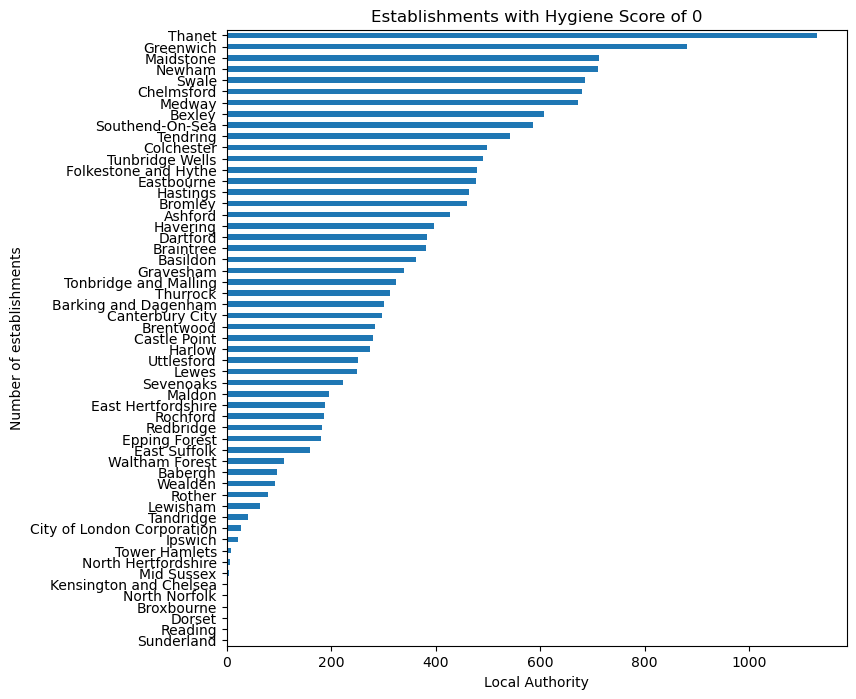

In [50]:
# Show the number of establishments with Hygiene Score of 0 in a bar chart
df = df.sort_values('count', ascending=True)
df.plot.barh(x='_id', figsize = (8,8), xlabel='Local Authority', ylabel='Number of establishments', title="Establishments with Hygiene Score of 0", legend=False)
plt.savefig('Output/Q4_Establishments_with_Hygiene_Score_of_0.png')
plt.show()